In [14]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.signal import detrend
import seaborn as sns
from scipy import fftpack

from __future__ import print_function, division
from numpy import *
%matplotlib notebook

import audio.wave as wave
from audio.filters import *
from audio.fourier import *
sns.set_style("dark")
import audio.index

In [15]:
def read(file):
    '''
    read a .hea file and convert it to a dataframe
    '''
    w = wfdb.rdsamp(file)
    return(pd.DataFrame(data=w[0], columns=w[1]['sig_name']))

In [16]:
############
### data ###
############

w = wfdb.rdsamp('Data/s9_walk') # acces to a specific file from Physionet
freq = w[1]['fs'] # header acces to frequency sampling
df = pd.DataFrame(data=w[0], columns=w[1]['sig_name']) # convert the data into Pandas DataFrame
data = df.chest_ecg.values
t = np.linspace(0, np.shape(data)[0] / freq, np.shape(data)[0])
 
#######################
### removing trends ###
#######################

no_trend_data = detrend(data) # remove linear trend

############
### plot ###
############

#plt.figure(figsize=(10, 7))
#plt.subplot(1, 3, 1)
#plt.plot(t, data)
#plt.title("Raw data")
#plt.subplot(1, 2, 2)
#plt.plot(t, no_trend_data)
#plt.title("No trend data")

In [17]:
data.min()

-1475.334439800836

In [18]:
w = wfdb.rdsamp('Data/s9_walk') # acces to a specific file from Physionet
freq = w[1]['fs']
df = pd.DataFrame(data=w[0], columns=w[1]['sig_name'])
dt = 1/freq
t = r_[0.:3.0:dt]
f = 440.0
x= df.chest_ecg.values
#x= x/amax(x)

In [20]:
np.shape(x)[0]

56321

<IPython.core.display.Javascript object>


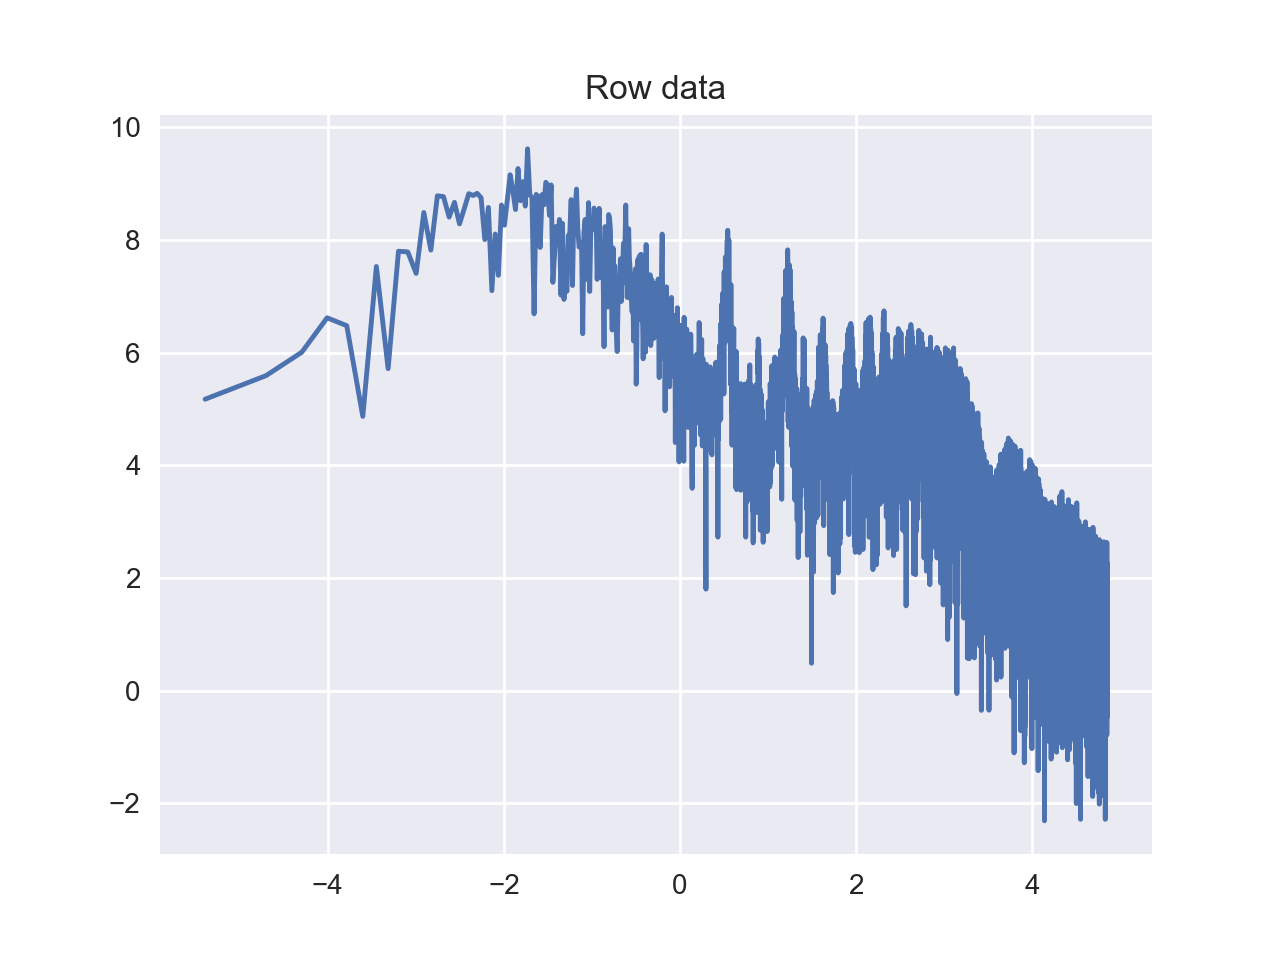

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [24]:
plt.figure()
Fx = F(x, dt=dt, power_of_two=True)
f = r_[0.0:freq/2.0: freq/np.shape(x)[0]]
plt.plot(np.log(f), np.log(abs(Fx(f))))
plt.title ('Row data')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


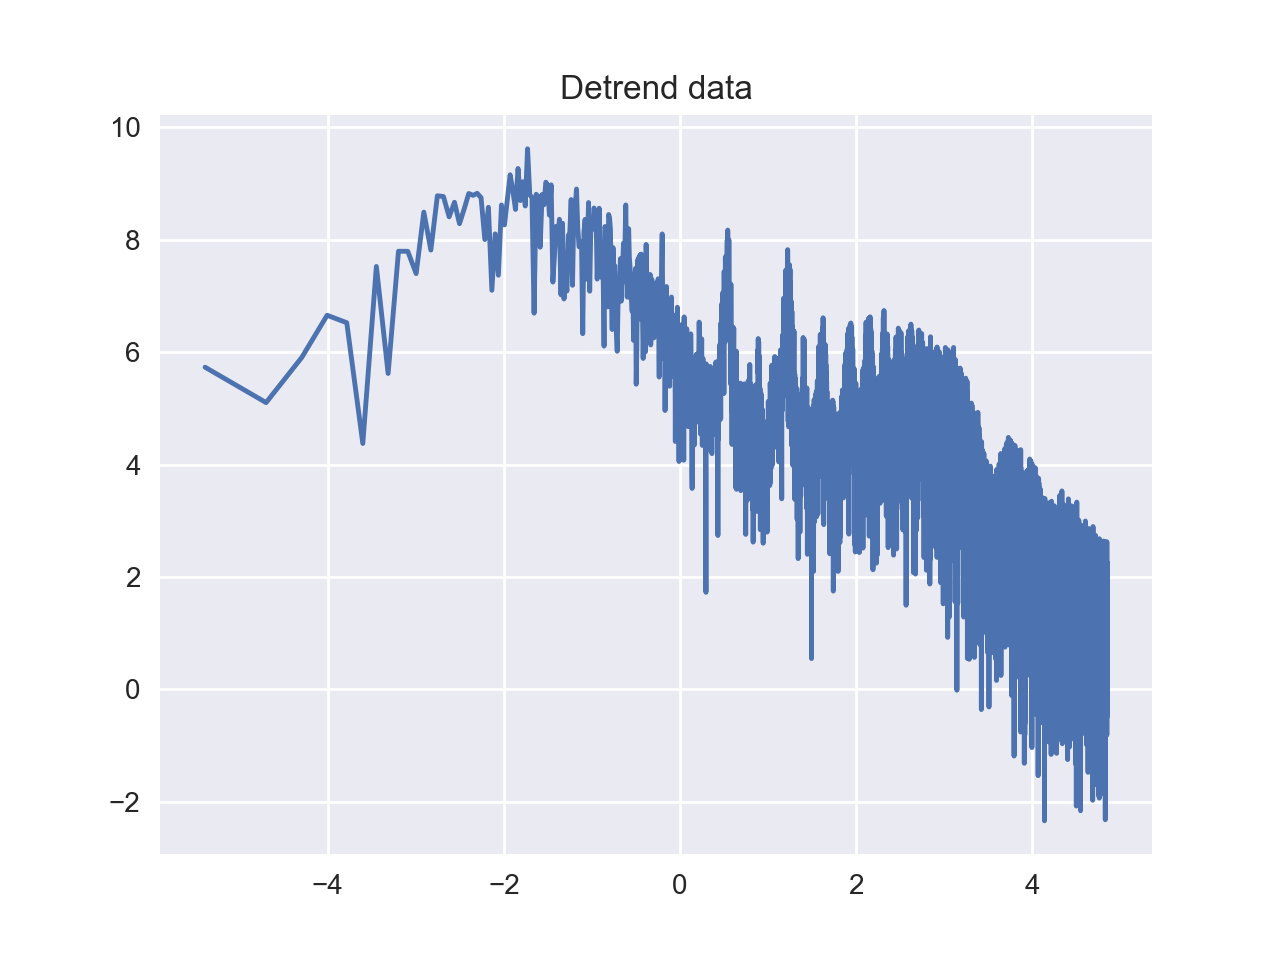

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [27]:
plt.figure()
F_detrend = F(no_trend_data, dt=dt, power_of_two=True)
f = r_[0.0:freq/2.0: freq/np.shape(x)[0]]
plt.plot(np.log(f), np.log(abs(F_detrend(f))))
plt.title ('Detrend data')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


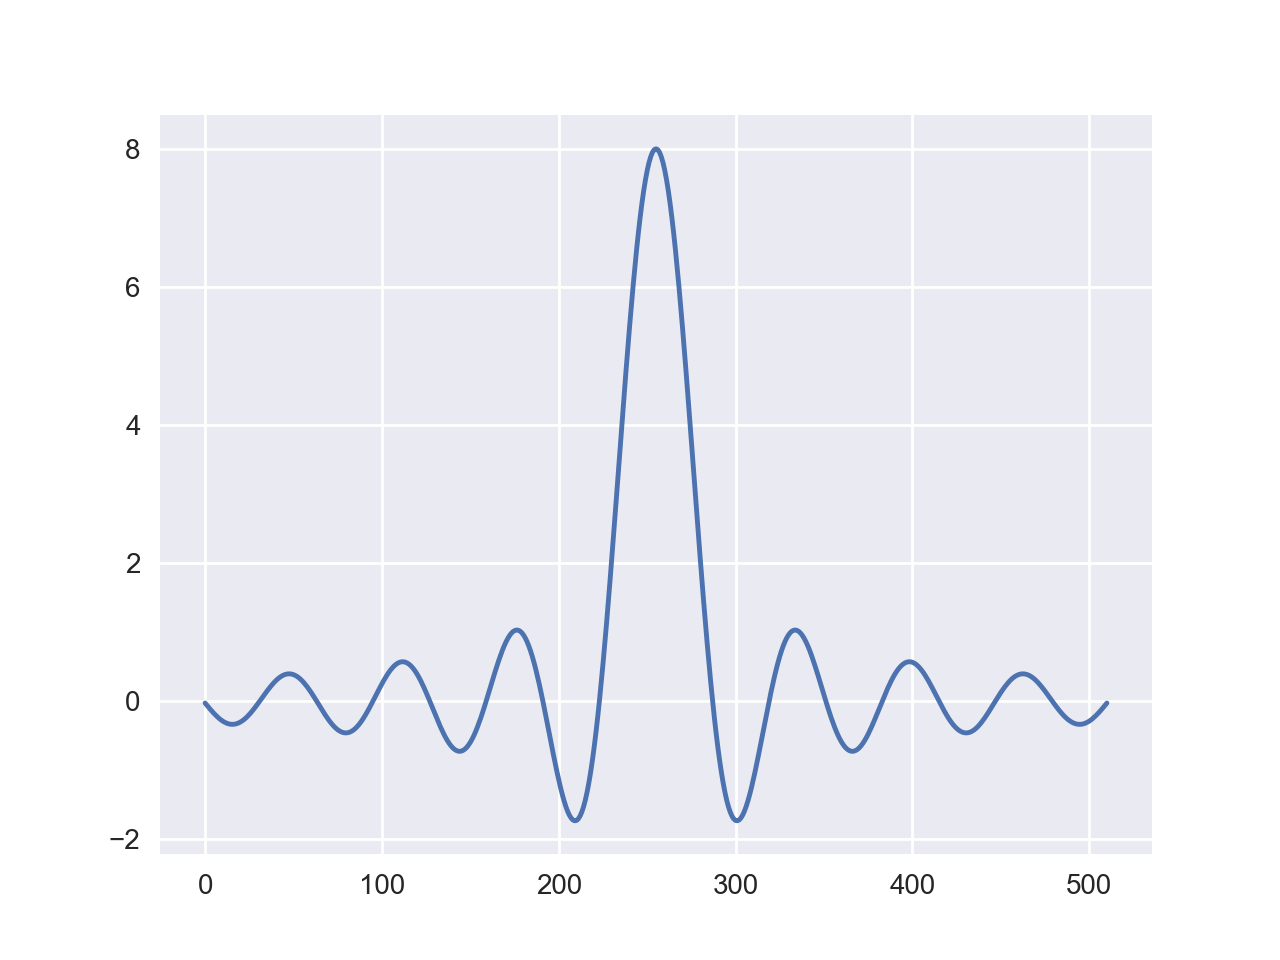

In [40]:
fc = 4
h = low_pass(fc, dt)
n = 511
hn = h(n)
plt.figure()
plt.plot(hn)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


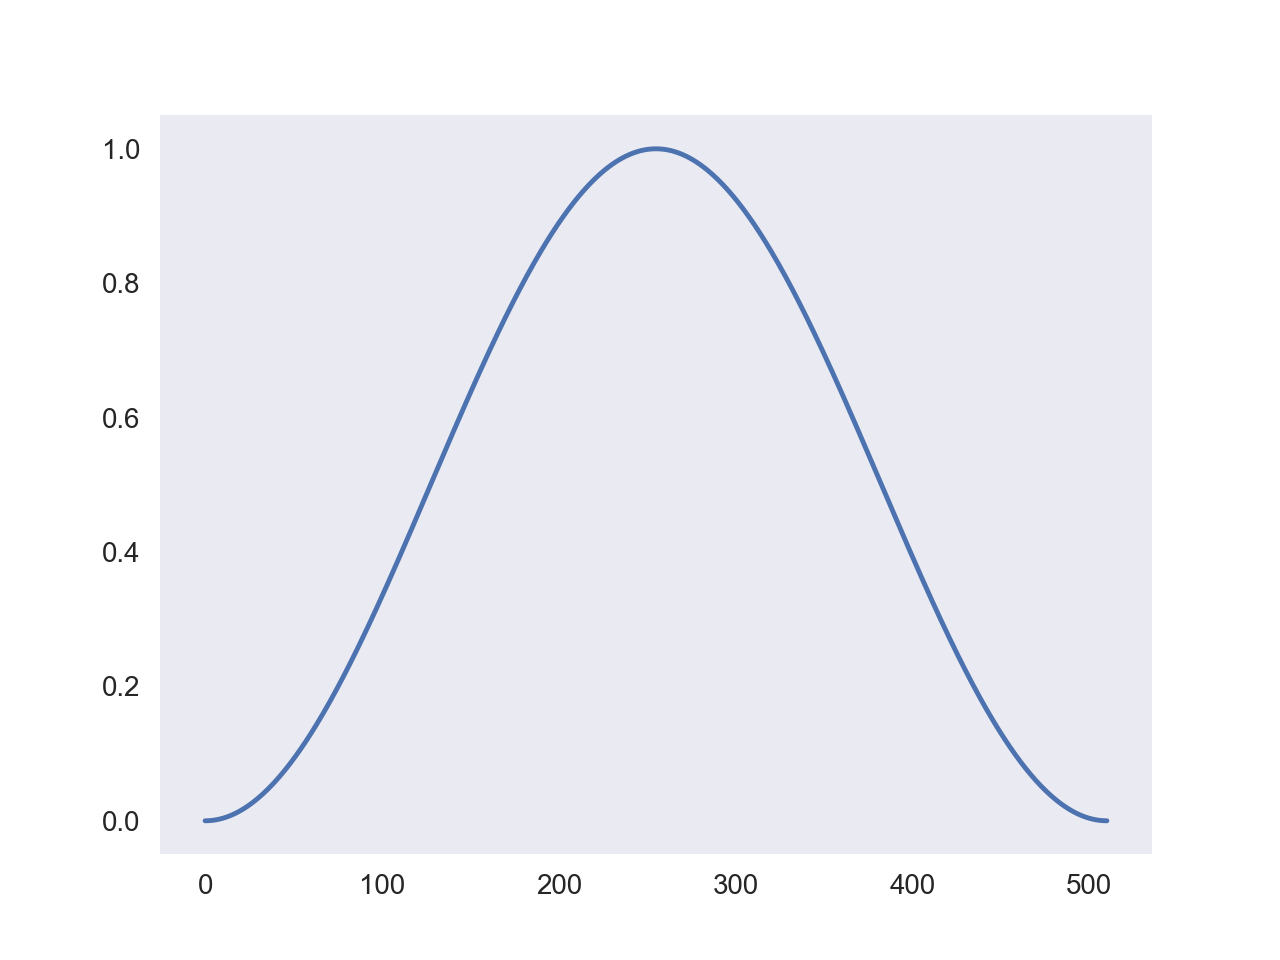

In [41]:
plt.figure()
w = hanning(511)
plt.plot(w)
plt.show()

<IPython.core.display.Javascript object>


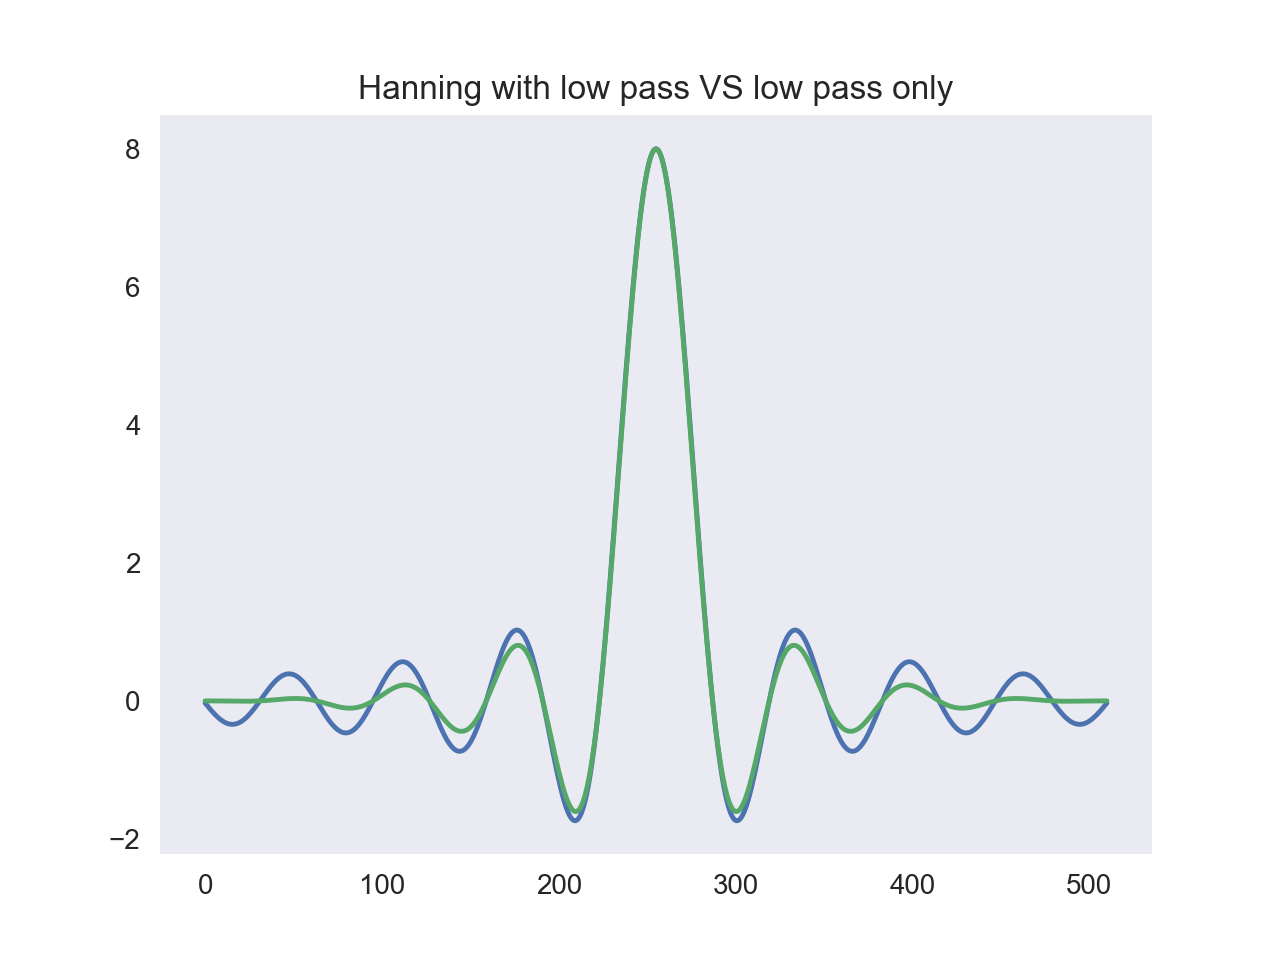

In [42]:
plt.figure()
plt.plot(hn)
plt.plot(hn * w)
plt.title( 'Hanning with low pass VS low pass only' )
plt.show()

<IPython.core.display.Javascript object>


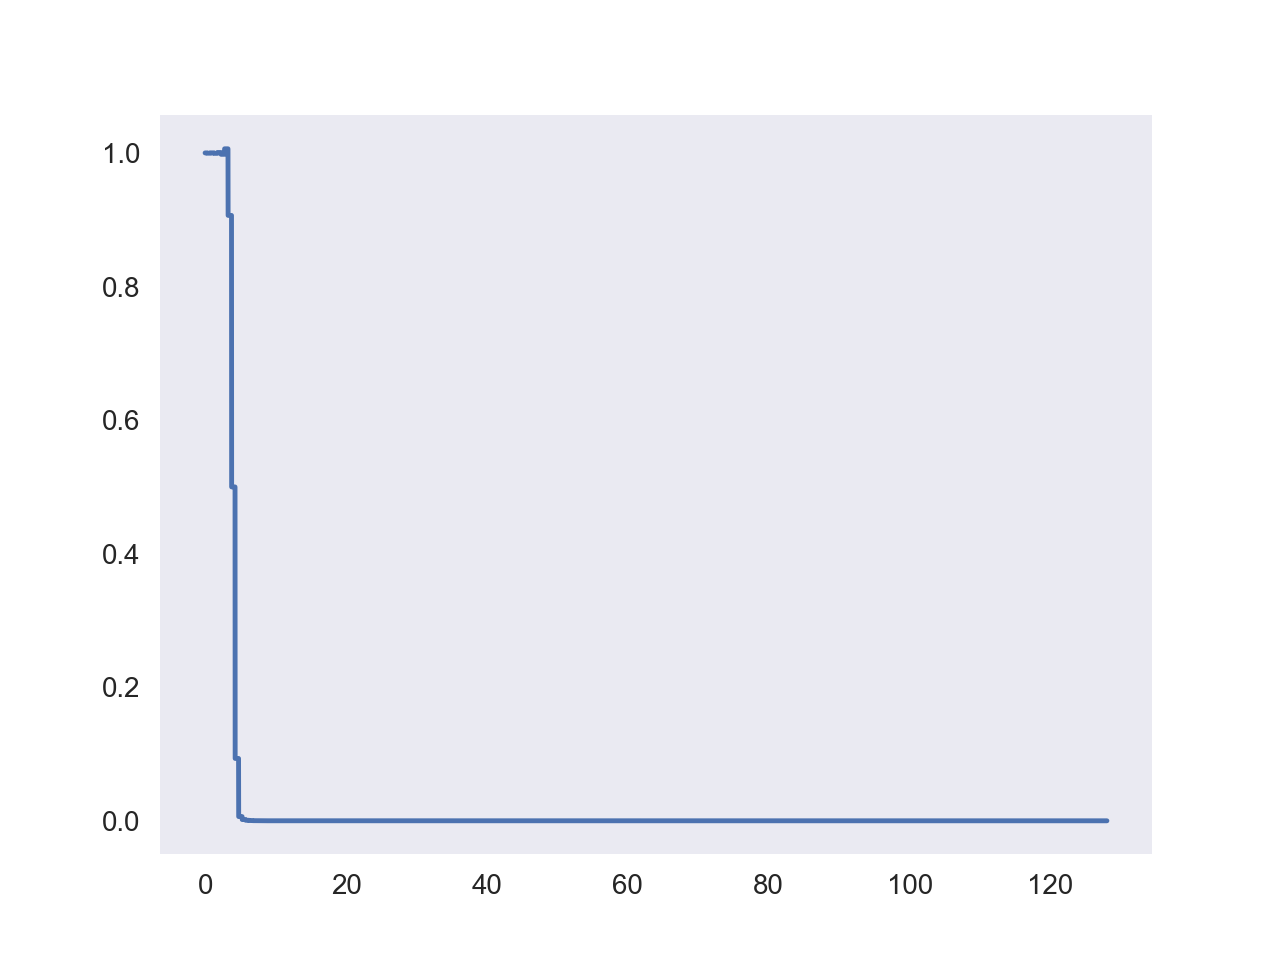

In [43]:
plt.figure()
Fhn = F(hn*w, dt=dt, power_of_two=True)
f = r_[0.0:freq/2.0: freq/np.shape(x)[0]]
plt.plot(f, abs(Fhn(f)))
plt.show()

<IPython.core.display.Javascript object>


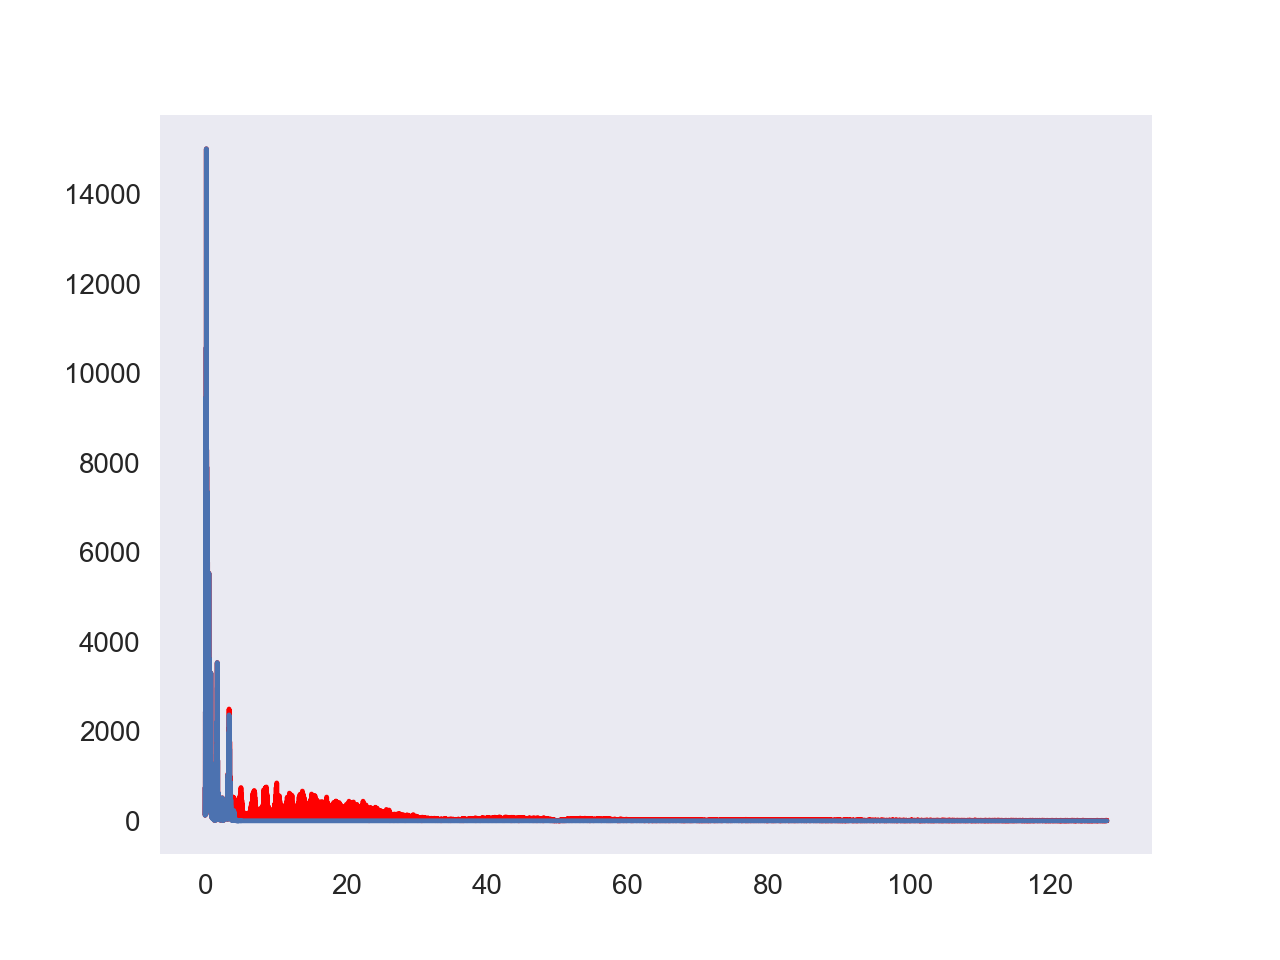

In [45]:
xf = dt*convolve(x, hn*w)
plt.figure()
Fxf = F(xf, dt=dt, power_of_two=True)
f = r_[0.0:freq/2.0: freq/np.shape(x)[0]]
plt.plot(f, abs(Fx(f)), "r")
plt.plot(f, abs(Fxf(f)))
plt.show()